# Extreme Fill 2D Example

In [1]:
%reload_ext yamlmagic

import yaml
import json
import coffeescript
from extremefill2D.fextreme import init_sim, restart_sim
from extremefill2D.fextreme.plot import get_contours

In [2]:
treant = init_sim('scripts/params.json', 'data', tags=['debug'])

In [3]:
treant = restart_sim(treant, 10)

In [4]:
import xarray
xarray.open_dataset(sorted(treant.glob('data*.nc'))[-1].abspath)

<xarray.Dataset>
Dimensions:             (cupric: 5510, distance: 5510, potential: 5510, suppressor: 5510, theta: 5510, x: 5510, y: 5510)
Coordinates:
  * cupric              (cupric) float64 1e+03 1e+03 1e+03 1e+03 1e+03 1e+03 ...
  * x                   (x) float64 4.356e-07 1.146e-06 1.718e-06 2.302e-06 ...
  * potential           (potential) float64 0.25 0.25 0.25 0.25 0.25 0.25 ...
  * suppressor          (suppressor) float64 0.02 0.02 0.02 0.02 0.02 0.02 ...
  * theta               (theta) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
  * distance            (distance) float64 -5.406e-06 -5.087e-06 -4.802e-06 ...
  * y                   (y) float64 -6.094e-05 -6.094e-05 -6.094e-05 ...
Data variables:
    nominal_dx          float64 5.6e-07
    time_step_duration  float64 0.02594
    elapsed_time        float64 0.1753

In [5]:
out = get_contours(trean)t

In [7]:
list(out)

ValueError: dimensions () must have the same length as the number of data dimensions, ndim=2

In [9]:
data = xarray.open_dataset(sorted(treant.glob('data*.nc'))[-1].abspath)

In [10]:
min(data.x.values)
max(data.y.values)
min(data.y.values)

-6.0939480000000014e-05

In [11]:
x_data = data.x.values
y_data = data.y.values
values = data.distance.values

In [36]:
import numpy as np

from scipy.interpolate import griddata

dx = 1e-7
xi = np.linspace(min(x_data), max(x_data), (max(x_data) - min(x_data)) // dx)
yi = np.linspace(min(y_data), max(y_data), (max(y_data) - min(y_data)) // dx)
# grid the data.
zi = griddata((x_data, y_data), values, (xi[None,:], yi[:,None]), method='cubic')
print(zi.shape)

(1990, 456)


In [37]:
from skimage import measure

contours = measure.find_contours(zi, 0.0)

print(len(contours))
print(contours)

1
[array([[ 609.07289376,    0.        ],
       [ 609.07393576,    1.        ],
       [ 609.07494827,    2.        ],
       ..., 
       [ 609.07083127,  453.        ],
       [ 609.07082188,  454.        ],
       [ 609.07081073,  455.        ]])]


In [38]:
%%yaml vega_dict
---
width: 500
height: 500

axes:
  - type: x
    scale: x
  - type: y
    scale: y

scales:
  - name: x
    nice: true
    range: width
    domain:
      data: contour_data
      field: x
  - name: y
    nice: true
    range: height
    domain:
      data: contour_data
      field: y
marks:
  - type: line
    from:
      data: contour_data
    properties:
      enter:
        x:
          scale: x
          field: x
        y:
          scale: y
          field: y
        stroke:
          value: steelblue

<IPython.core.display.Javascript object>

In [39]:
import pandas
df = pandas.DataFrame({'x': contours[0][:, 0], 'y': contours[0][:, 1]})
data = df.to_dict(orient='records')
vega_dict['data'] = [{'name' : 'contour_data', 'values' : data}]

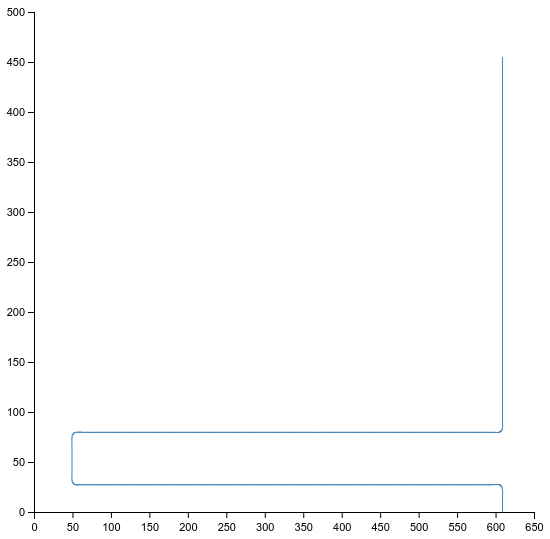

In [40]:
import vega
vega_dict_ = dict(**vega_dict, )
vega.Vega(vega_dict)

In [30]:
print(vega_dict['data'])

[{'y': 0.0, 'x': 304.38321083641642}, {'y': 1.0, 'x': 304.38418157108873}, {'y': 2.0, 'x': 304.38415359195255}, {'y': 3.0, 'x': 304.38304563712074}, {'y': 4.0, 'x': 304.38096431407615}, {'y': 5.0, 'x': 304.37983084242126}, {'y': 6.0, 'x': 304.3832000817664}, {'y': 7.0, 'x': 304.38239920135527}, {'y': 8.0, 'x': 304.4005412861768}, {'y': 9.0, 'x': 304.44484003352784}, {'y': 10.0, 'x': 304.43405800116602}, {'y': 11.0, 'x': 304.37347416191272}, {'y': 12.0, 'x': 304.13384002480041}, {'y': 12.211943289390714, 'x': 304.0}, {'y': 13.0, 'x': 303.39646024946524}, {'y': 13.341098805647754, 'x': 303.0}, {'y': 13.628296872820455, 'x': 302.0}, {'y': 13.687755381692295, 'x': 301.0}, {'y': 13.675471972618558, 'x': 300.0}, {'y': 13.686897740944184, 'x': 299.0}, {'y': 13.655218480602738, 'x': 298.0}, {'y': 13.627447088170733, 'x': 297.0}, {'y': 13.621954127670119, 'x': 296.0}, {'y': 13.622720843553543, 'x': 295.0}, {'y': 13.623995175229323, 'x': 294.0}, {'y': 13.62496358937789, 'x': 293.0}, {'y': 13.624

In [9]:
import numpy as np
abc = [np.array((0, 0)), np.array((1, 1))]

In [11]:
from toolz.curried import map

In [13]:
list(map(lambda x: x * 2, abc))

[array([0, 0]), array([2, 2])]

In [3]:
out = get_contours(treant)

In [4]:
out

[array([[ 108.3995759 ,    0.        ],
        [ 108.39941572,    1.        ],
        [ 108.40033834,    2.        ],
        [ 108.40460384,    3.        ],
        [ 108.40603197,    4.        ],
        [ 108.        ,    4.6074189 ],
        [ 107.        ,    4.80426125],
        [ 106.        ,    4.80221495],
        [ 105.        ,    4.79971006],
        [ 104.        ,    4.79967745],
        [ 103.        ,    4.7997286 ],
        [ 102.        ,    4.7997742 ],
        [ 101.        ,    4.79964645],
        [ 100.        ,    4.79970218],
        [  99.        ,    4.79986078],
        [  98.        ,    4.79963844],
        [  97.        ,    4.79992578],
        [  96.        ,    4.79971051],
        [  95.        ,    4.79952546],
        [  94.        ,    4.79975624],
        [  93.        ,    4.79969621],
        [  92.        ,    4.79981367],
        [  91.        ,    4.79965429],
        [  90.        ,    4.7997737 ],
        [  89.        ,    4.7997541 ],


In [5]:
type(out)

list

In [7]:
list(map(lambda x: x, out))

[array([[ 108.3995759 ,    0.        ],
        [ 108.39941572,    1.        ],
        [ 108.40033834,    2.        ],
        [ 108.40460384,    3.        ],
        [ 108.40603197,    4.        ],
        [ 108.        ,    4.6074189 ],
        [ 107.        ,    4.80426125],
        [ 106.        ,    4.80221495],
        [ 105.        ,    4.79971006],
        [ 104.        ,    4.79967745],
        [ 103.        ,    4.7997286 ],
        [ 102.        ,    4.7997742 ],
        [ 101.        ,    4.79964645],
        [ 100.        ,    4.79970218],
        [  99.        ,    4.79986078],
        [  98.        ,    4.79963844],
        [  97.        ,    4.79992578],
        [  96.        ,    4.79971051],
        [  95.        ,    4.79952546],
        [  94.        ,    4.79975624],
        [  93.        ,    4.79969621],
        [  92.        ,    4.79981367],
        [  91.        ,    4.79965429],
        [  90.        ,    4.7997737 ],
        [  89.        ,    4.7997541 ],
